# データの前処理

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# データの読み込み
df_train = pd.read_csv('/content/bank_train.csv')
df_train.head(3)

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result
0,50.0,entrepreneur,married,secondary,no,1857,no,yes,-1.0,0,unknown,fail
1,37.0,technician,single,secondary,no,363,yes,no,-1.0,0,unknown,fail
2,35.0,blue-collar,married,primary,no,422,yes,no,-1.0,0,unknown,fail


In [ ]:
df_test = pd.read_csv('/content/bank_test02.csv')
df_test.head(3)

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result
0,55.0,self-employed,married,tertiary,no,1810,yes,no,-1.0,0,unknown,fail
1,54.0,management,married,tertiary,no,364,yes,no,-1.0,0,unknown,fail
2,35.0,technician,married,secondary,no,-180,no,yes,-1.0,0,unknown,success


In [ ]:
# データの形を確認
df_train.shape

(6416, 12)

In [ ]:
df_test.shape

(15000, 12)

**データを加工**

## 重複行を確認

In [ ]:
df_train.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
6411    False
6412    False
6413    False
6414    False
6415    False
Length: 6416, dtype: bool

In [ ]:
df_train.duplicated(keep=False).value_counts()

False    6357
True       59
dtype: int64

In [ ]:
df_test.duplicated(keep=False).value_counts()

False    14678
True       322
dtype: int64

In [ ]:
df_train.drop_duplicates(inplace=True)

In [ ]:
df_test.drop_duplicates(inplace=True)

In [ ]:
df_train.duplicated(keep=False).value_counts()

False    6384
dtype: int64

In [ ]:
df_test.duplicated(keep=False).value_counts()

False    14810
dtype: int64

## 欠損値処理

In [ ]:
# 欠損値の確認
df_train.isnull()[:5]

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 欠損値の数を確認
df_train.isnull().sum()

age           90
job            3
marital       89
education      0
default       29
balance        0
housing       61
loan         217
pdays         36
previous       0
poutcome     250
result         0
dtype: int64

In [ ]:
# 欠損値の数を確認
df_test.isnull().sum()

age           35
job            8
marital       45
education      0
default       62
balance        0
housing      114
loan          24
pdays         78
previous       0
poutcome     152
result         0
dtype: int64

In [ ]:
# データ統計量の確認
df_train.describe()

,age,balance,pdays,previous
count,6294.000000,6384.000000,6348.000000,6384.000000
mean,40.995551,1336.200501,39.821204,0.576284
std,10.623109,2716.573432,97.948651,1.959517
min,18.000000,-3313.000000,-1.000000,0.000000
25%,33.000000,78.000000,-1.000000,0.000000
50%,39.000000,477.500000,-1.000000,0.000000
75%,49.000000,1472.000000,-1.000000,0.000000
max,93.000000,43074.000000,838.000000,55.000000


### 数値の欠損値補完

#### age

(array([ 171., 1368., 1924., 1105., 1040.,  541.,   81.,   37.,   25.,
           2.]),
 array([18. , 25.5, 33. , 40.5, 48. , 55.5, 63. , 70.5, 78. , 85.5, 93. ]),
 <a list of 10 Patch objects>)

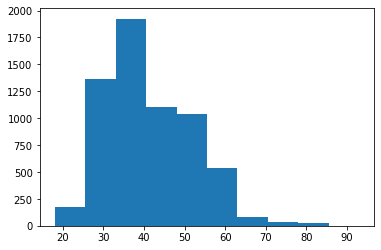

In [ ]:
plt.hist(df_train['age'])

(array([ 452., 3815., 4183., 2621., 2361., 1085.,  120.,  100.,   33.,
           5.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 10 Patch objects>)

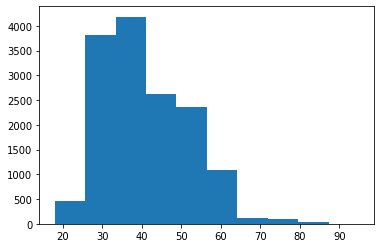

In [ ]:
plt.hist(df_test['age'])

In [ ]:
# ageの平均値の確認
df_train['age'].mean()

40.99555131871624

In [ ]:
# ageの平均値の確認
df_test['age'].mean()

40.975634517766494

In [ ]:
# 欠損値を平均値で補完
df_train = df_train.fillna({'age':df_train['age'].mean()})

In [ ]:
# 欠損値を平均値で補完
df_test = df_test.fillna({'age':df_test['age'].mean()})

#### pdays

(array([5.251e+03, 2.790e+02, 3.380e+02, 2.340e+02, 2.260e+02, 1.400e+01,
        2.000e+00, 1.000e+00, 0.000e+00, 3.000e+00]),
 array([ -1. ,  82.9, 166.8, 250.7, 334.6, 418.5, 502.4, 586.3, 670.2,
        754.1, 838. ]),
 <a list of 10 Patch objects>)

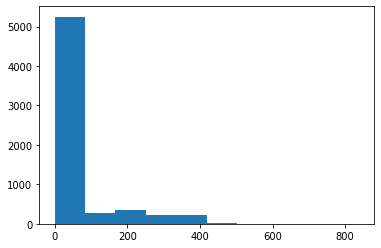

In [ ]:
plt.hist(df_train['pdays'])

(array([1.2106e+04, 7.1500e+02, 7.2200e+02, 5.3500e+02, 5.9200e+02,
        3.4000e+01, 1.3000e+01, 5.0000e+00, 4.0000e+00, 6.0000e+00]),
 array([ -1. ,  82.9, 166.8, 250.7, 334.6, 418.5, 502.4, 586.3, 670.2,
        754.1, 838. ]),
 <a list of 10 Patch objects>)

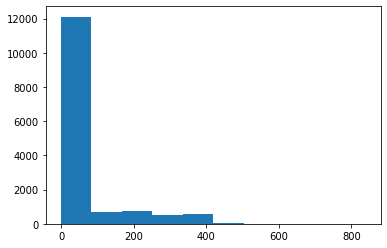

In [ ]:
plt.hist(df_test['pdays'])

In [ ]:
# pdaysの中央値の確認
df_train['pdays'].median()

-1.0

In [ ]:
# pdaysの中央値の確認
df_test['pdays'].median()

-1.0

In [ ]:
# 欠損値を中央値で補完
df_train = df_train.fillna({'pdays':df_train['pdays'].median()})

In [ ]:
# 欠損値を中央値で補完
df_test = df_test.fillna({'pdays':df_test['pdays'].median()})

In [ ]:
# 欠損値の数を確認
df_train.isnull().sum()

age            0
job            3
marital       89
education      0
default       29
balance        0
housing       61
loan         217
pdays          0
previous       0
poutcome     250
result         0
dtype: int64

In [ ]:
# 欠損値の数を確認
df_test.isnull().sum()

age            0
job            8
marital       45
education      0
default       62
balance        0
housing      114
loan          24
pdays          0
previous       0
poutcome     152
result         0
dtype: int64

### 文字列型の欠損値補完

#### job

In [ ]:
df_train['job'].unique()

array(['entrepreneur', 'technician', 'blue-collar', 'retired',
       'management', 'unknown', 'admin.', 'student', 'services',
       'unemployed', 'self-employed', 'housemaid', nan], dtype=object)

In [ ]:
df_test['job'].unique()

array(['self-employed', 'management', 'technician', 'retired',
       'unemployed', 'blue-collar', 'services', 'admin.', 'entrepreneur',
       'student', 'housemaid', 'unknown', nan], dtype=object)

In [ ]:
df_train['job'].mode()

0    blue-collar
dtype: object

In [ ]:
df_test['job'].mode()

0    blue-collar
dtype: object

In [ ]:
df_train['job'].mode()[0]

'blue-collar'

In [ ]:
df_test['job'].mode()[0]

'blue-collar'

In [ ]:
# 最頻値を使用して欠損値を補完
df_train = df_train.fillna({'job':df_train['job'].mode()[0]})

In [ ]:
# 最頻値を使用して欠損値を補完
df_test = df_test.fillna({'job':df_test['job'].mode()[0]})

#### marital

In [ ]:
df_train['marital'].unique()

array(['married', 'single', 'divorced', nan], dtype=object)

In [ ]:
df_test['marital'].unique()

array(['married', 'divorced', 'single', nan], dtype=object)

In [ ]:
df_train['marital'].mode()

0    married
dtype: object

In [ ]:
df_test['marital'].mode()

0    married
dtype: object

In [ ]:
df_train['marital'].mode()[0]

'married'

In [ ]:
df_test['marital'].mode()[0]

'married'

In [ ]:
# 最頻値を使用して欠損値を補完
df_train = df_train.fillna({'marital':df_train['marital'].mode()[0]})

In [ ]:
# 最頻値を使用して欠損値を補完
df_test = df_test.fillna({'marital':df_test['marital'].mode()[0]})

#### default

In [ ]:
df_train['default'].unique()

array(['no', 'yes', nan], dtype=object)

In [ ]:
df_test['default'].unique()

array(['no', 'yes', nan], dtype=object)

In [ ]:
df_train['default'].mode()

0    no
dtype: object

In [ ]:
df_test['default'].mode()

0    no
dtype: object

In [ ]:
df_train['default'].mode()[0]

'no'

In [ ]:
df_test['default'].mode()[0]

'no'

In [ ]:
# 最頻値を使用して欠損値を補完
df_train = df_train.fillna({'default':df_train['default'].mode()[0]})

In [ ]:
# 最頻値を使用して欠損値を補完
df_test = df_test.fillna({'default':df_test['default'].mode()[0]})

#### housing

In [ ]:
df_train['housing'].unique()

array(['no', 'yes', nan], dtype=object)

In [ ]:
df_test['housing'].unique()

array(['yes', 'no', nan], dtype=object)

In [ ]:
df_train['housing'].mode()

0    yes
dtype: object

In [ ]:
df_test['housing'].mode()

0    yes
dtype: object

In [ ]:
df_train['housing'].mode()[0]

'yes'

In [ ]:
df_test['housing'].mode()[0]

'yes'

In [ ]:
# 最頻値を使用して欠損値を補完
df_train = df_train.fillna({'housing':df_train['housing'].mode()[0]})

In [ ]:
# 最頻値を使用して欠損値を補完
df_test = df_test.fillna({'housing':df_test['housing'].mode()[0]})

#### loan

In [ ]:
df_train['loan'].unique()

array(['yes', 'no', nan], dtype=object)

In [ ]:
df_test['loan'].unique()

array(['no', 'yes', nan], dtype=object)

In [ ]:
df_train['loan'].mode()

0    no
dtype: object

In [ ]:
df_test['loan'].mode()

0    no
dtype: object

In [ ]:
df_train['loan'].mode()[0]

'no'

In [ ]:
df_test['loan'].mode()[0]

'no'

In [ ]:
# 最頻値を使用して欠損値を補完
df_train = df_train.fillna({'loan':df_train['loan'].mode()[0]})

In [ ]:
# 最頻値を使用して欠損値を補完
df_test = df_test.fillna({'loan':df_test['loan'].mode()[0]})

#### poutcome


In [ ]:
df_train['poutcome'].unique()

array(['unknown', 'success', 'failure', 'other', nan], dtype=object)

In [ ]:
df_test['poutcome'].unique()

array(['unknown', 'success', 'failure', 'other', nan], dtype=object)

In [ ]:
df_train['poutcome'].mode()

0    unknown
dtype: object

In [ ]:
df_test['poutcome'].mode()

0    unknown
dtype: object

In [ ]:
df_train['poutcome'].mode()[0]

'unknown'

In [ ]:
df_test['poutcome'].mode()[0]

'unknown'

In [ ]:
# 最頻値を使用して欠損値を補完
df_train = df_train.fillna({'poutcome':df_train['poutcome'].mode()[0]})

In [ ]:
# 最頻値を使用して欠損値を補完
df_test = df_test.fillna({'poutcome':df_test['poutcome'].mode()[0]})

In [ ]:
# 欠損値の数を確認
df_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
pdays        0
previous     0
poutcome     0
result       0
dtype: int64

In [ ]:
# 欠損値の数を確認
df_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
pdays        0
previous     0
poutcome     0
result       0
dtype: int64

## ユニークな値を数値に変換

### Label Encording

In [ ]:
# モデルの宣言
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### default

In [ ]:
le.fit(df_train['default'])

LabelEncoder()

In [ ]:
le.fit(df_test['default'])

LabelEncoder()

In [ ]:
# 適用
le.transform(df_train['default'])

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# 適用
le.transform(df_test['default'])

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df_train['default'] = le.transform(df_train['default'])

In [ ]:
le.classes_

array(['no', 'yes'], dtype=object)

In [ ]:
df_test['default'] = le.transform(df_test['default'])

In [ ]:
le.classes_

array(['no', 'yes'], dtype=object)

**default = 'no' →0**

**default = 'yes' →1**

#### housing

In [ ]:
le.fit(df_train['housing'])

LabelEncoder()

In [ ]:
le.fit(df_test['housing'])

LabelEncoder()

In [ ]:
# 適用
le.transform(df_train['housing'])

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
# 適用
le.transform(df_test['housing'])

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
df_train['housing'] = le.transform(df_train['housing'])

In [ ]:
le.classes_

array(['no', 'yes'], dtype=object)

In [ ]:
le.classes_

array(['no', 'yes'], dtype=object)

In [ ]:
df_test['housing'] = le.transform(df_test['housing'])

**housing = 'no' →0**

**housing = 'yes' →1**

#### loan

In [ ]:
le.fit(df_train['loan'])

LabelEncoder()

In [ ]:
le.fit(df_test['loan'])

LabelEncoder()

In [ ]:
# 適用
le.transform(df_train['loan'])

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
# 適用
le.transform(df_test['loan'])

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df_train['loan'] = le.transform(df_train['loan'])

In [ ]:
le.classes_

array(['no', 'yes'], dtype=object)

In [ ]:
df_test['loan'] = le.transform(df_test['loan'])

In [ ]:
le.classes_

array(['no', 'yes'], dtype=object)

**loan = 'no' →0**

**loan = 'yes' →1**

#### result

In [ ]:
le.fit(df_train['result'])

LabelEncoder()

In [ ]:
le.fit(df_test['result'])

LabelEncoder()

In [ ]:
# 適用
le.transform(df_train['result'])

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# 適用
le.transform(df_test['result'])

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df_train['result'] = le.transform(df_train['result'])

In [ ]:
le.classes_

array(['fail', 'success'], dtype=object)

In [ ]:
df_test['result'] = le.transform(df_test['result'])

In [ ]:
le.classes_

array(['fail', 'success'], dtype=object)

**result = 'fail' →0　(不成約)**

**result = 'success' →1　(成約)**

### One-Hot Encording

In [ ]:
# カテゴリカル変数を含んだデータのみを抽出
df_train_obj = df_train.select_dtypes(include='object')
df_train_obj.head(3)

,job,marital,education,poutcome
0,entrepreneur,married,secondary,unknown
1,technician,single,secondary,unknown
2,blue-collar,married,primary,unknown


In [ ]:
# カテゴリカル変数を含んだデータのみを抽出
df_test_obj = df_test.select_dtypes(include='object')
df_test_obj.head(3)

,job,marital,education,poutcome
0,self-employed,married,tertiary,unknown
1,management,married,tertiary,unknown
2,technician,married,secondary,unknown


In [ ]:
df_train_uni = df_train_obj.nunique()
df_train_uni

job          12
marital       3
education     4
poutcome      4
dtype: int64

In [ ]:
df_test_uni = df_test_obj.nunique()
df_test_uni

job          12
marital       3
education     4
poutcome      4
dtype: int64

In [ ]:
for uni in df_train_obj.columns:
    print(uni)
    print(df_train_obj[uni].unique())

job
['entrepreneur' 'technician' 'blue-collar' 'retired' 'management'
 'unknown' 'admin.' 'student' 'services' 'unemployed' 'self-employed'
 'housemaid']
marital
['married' 'single' 'divorced']
education
['secondary' 'primary' 'tertiary' 'unknown']
poutcome
['unknown' 'success' 'failure' 'other']


In [ ]:
for uni in df_test_obj.columns:
    print(uni)
    print(df_test_obj[uni].unique())

job
['self-employed' 'management' 'technician' 'retired' 'unemployed'
 'blue-collar' 'services' 'admin.' 'entrepreneur' 'student' 'housemaid'
 'unknown']
marital
['married' 'divorced' 'single']
education
['tertiary' 'secondary' 'primary' 'unknown']
poutcome
['unknown' 'success' 'failure' 'other']


In [ ]:
df_train.shape

(6384, 12)

In [ ]:
df_test.shape

(14810, 12)

In [ ]:
df_train = pd.get_dummies(df_train, drop_first=False)

In [ ]:
df_test = pd.get_dummies(df_test, drop_first=False)

In [ ]:
df_train.head(3)

,age,default,balance,housing,loan,pdays,previous,result,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,50.0,0,1857,0,1,-1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,37.0,0,363,1,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
2,35.0,0,422,1,0,-1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [ ]:
df_test.head(3)

,age,default,balance,housing,loan,pdays,previous,result,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,55.0,0,1810,1,0,-1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,54.0,0,364,1,0,-1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,35.0,0,-180,0,1,-1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
df_train.shape

(6384, 31)

In [ ]:
df_test.shape

(14810, 31)

# 重回帰分析の実装

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# 入力変数と出力変数の切り分け
x_train = df_train.drop('result', axis=1).values
t_train = df_train['result'].values

# インスタンス化
model = LinearRegression()

# モデルの学習
model.fit(x_train, t_train)

LinearRegression()

In [ ]:
# 入力変数と出力変数の切り分け
x_test = df_test.drop('result', axis=1).values
t_test = df_test['result'].values

# インスタンス化
model = LinearRegression()

# モデルの学習
model.fit(x_test, t_test)

LinearRegression()

In [ ]:
# モデルの検証
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.13287787508971194
test score :  0.1194094225995137


In [ ]:
y_pred = model.predict(x_test)

# モデルの学習


In [ ]:
# モデルの定義
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

In [ ]:
# モデルの学習
dtree.fit(x_train, t_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# モデルの検証
print('train score : ', dtree.score(x_train, t_train))
print('test score : ', dtree.score(x_test, t_test))

train score :  0.9990601503759399
test score :  0.8588116137744767


※決定係数ではなく、**正解率**

In [ ]:
# 推論
dtree.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

# 木構造と Feature importance の確認

In [ ]:
# 木構造の書き出し
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree)

In [ ]:
# 木構造の表示
graph_tree = graphviz.Source(dot_data)
graph_tree

In [ ]:
#feature importance
feature_importance = dtree.feature_importances_
feature_importance

array([0.17356196, 0.00450344, 0.38287546, 0.01172727, 0.01126232,
       0.06967982, 0.03140509, 0.00758129, 0.0129311 , 0.00921255,
       0.00355712, 0.0115802 , 0.00253605, 0.00561873, 0.00809708,
       0.00929463, 0.01453895, 0.0101658 , 0.00300727, 0.01662068,
       0.00697719, 0.01274671, 0.01568448, 0.0161844 , 0.01728327,
       0.01226719, 0.00279925, 0.00245934, 0.1116102 , 0.00223116])

# サポートベクトルマシン (SVM)

In [ ]:
# モデルの定義
from sklearn.svm import SVC
svc = SVC()

In [ ]:
# モデルの学習
svc.fit(x_train, t_train)

SVC()

In [ ]:
# モデルの検証
print('train score : ', svc.score(x_train, t_train))
print('test score : ', svc.score(x_test, t_test))

train score :  0.8851817042606517
test score :  0.8813639432815665


# ロジスティック回帰でモデル構築


In [ ]:
# モデルの定義
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
# モデルの学習
model.fit(x_train, t_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# モデルの検証
print(model.score(x_train, t_train))
print(model.score(x_test, t_test))

0.8952067669172933
0.8905469277515192


In [ ]:
# 推論
y_pred = model.predict(x_test)

In [ ]:
np.unique(y_pred)

array([0, 1])

In [ ]:
np.unique(t_test, return_counts=True)

(array([0, 1]), array([13053,  1757]))

In [ ]:
from sklearn import metrics

In [ ]:
precision = metrics.precision_score(t_test, y_pred, average=None)
precision

array([0.89546146, 0.69101124])

In [ ]:
recall = metrics.recall_score(t_test, y_pred, average=None)
recall

array([0.99157282, 0.14001138])

# 分類の閾値の調整

In [ ]:
y_proba = model.predict_proba(x_test)
y_proba[0]

array([0.94002239, 0.05997761])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

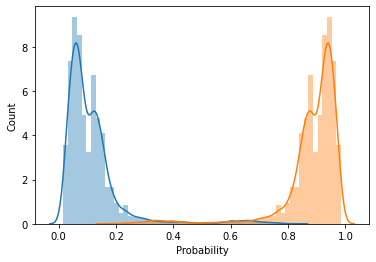

In [ ]:
sns.distplot(y_proba[:, 1])
sns.distplot(y_proba[:, 0])
plt.xlabel('Probability')
plt.ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


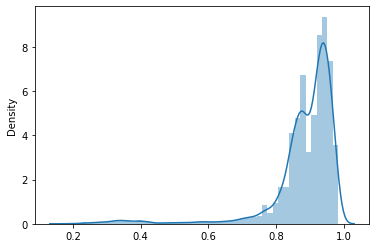

In [ ]:
sns.distplot(y_proba[:, 0])

In [ ]:
y_pred = (y_proba[:,0] > 0.75).astype('i')

In [ ]:
np.unique(y_pred, return_counts=True)

(array([0, 1], dtype=int32), array([  857, 13953]))

In [ ]:
print('accuracy : ', metrics.accuracy_score(t_test, y_pred))
print('recall : ', metrics.recall_score(t_test, y_pred, average=None))

accuracy :  0.12045914922349764
recall :  [0.03386195 0.76380194]


# 参考

### 重みの調整

In [ ]:
model = LogisticRegression(class_weight='balanced')

In [ ]:
model.fit(x_train, t_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(class_weight='balanced')

In [ ]:
# 推論
y_pred = model.predict(x_test)

In [ ]:
print('accuracy : ', metrics.accuracy_score(t_test, y_pred))
print('recall : ', metrics.recall_score(t_test, y_pred, average=None))

accuracy :  0.6713031735313977
recall :  [0.68060982 0.60216278]


重みを調整したことで、正例が1の時のrecallは0.60になった

### DownSampling

In [ ]:
df_train = pd.DataFrame(x_train)
df_train['result'] = t_train
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,result
0,50.0,0.0,1857.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,37.0,0.0,363.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,35.0,0.0,422.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,55.0,0.0,119.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,40.0,0.0,1066.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [ ]:
# result=1のサンプルのインデックスを取得（少ない方のカテゴリ）
anomaly_indices = df_train[df_train['result'] == 1].index
num_records = len(anomaly_indices)

print(num_records)

733


In [ ]:
# result=0 のサンプルのインデックスを取得（多い方のカテゴリ）
normal_indices = df_train[df_train['result'] == 0].index

sampled_indices = np.random.choice(normal_indices, num_records, replace=False)

len(sampled_indices)

733

In [ ]:
total_indices = np.concatenate([anomaly_indices, sampled_indices])
print(len(total_indices))

1466


In [ ]:
df_undersampled = df_train.iloc[total_indices, :]

In [ ]:
x_train_undersampled = df_undersampled.drop('result', axis=1).values
t_train_undersampled = df_undersampled['result'].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


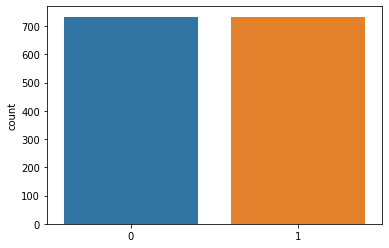

In [ ]:
sns.countplot(t_train_undersampled);

In [ ]:
# モデルの宣言
model = LogisticRegression()
# モデルの学習
model.fit(x_train_undersampled, t_train_undersampled)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# 推論
y_pred = model.predict(x_test)

In [ ]:
# AccuracyとRecallの確認
print('accuracy : ', metrics.accuracy_score(t_test, y_pred))
print('recall : ', metrics.recall_score(t_test, y_pred, average=None))

accuracy :  0.6730587440918299
recall :  [0.68344442 0.59590211]


### SMOTE を用いての OverSampling

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0, k_neighbors=10)

In [ ]:
x_train_oversampled, t_train_oversampled = smote.fit_resample(x_train, t_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


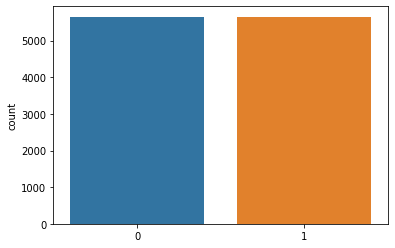

In [ ]:
sns.countplot(t_train_oversampled);

In [ ]:
# モデルの宣言
model = LogisticRegression()
# モデルの学習
model.fit(x_train_oversampled, t_train_oversampled)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# 推論
y_pred = model.predict(x_test)

In [ ]:
# Accuracy と Recall の確認
print('accuracy : ', metrics.accuracy_score(t_test, y_pred))
print('recall : ', metrics.recall_score(t_test, y_pred, average=None))

accuracy :  0.6745442268737339
recall :  [0.68520647 0.59533295]


# まとめ

データが不均衡だったため、分類の閾値を調整したところ、recallは0.76380194になった。

参考として、accuracyとのバランスを考慮した他のモデルも添付する。